# PROJECT: INVESTIGATE TMDB DATASET 1960 - 2015

### Table Of Contents
*   Introduction
*   Objective
*   Questions
*   Data Wrangling
*   Data Analysis & Exploratory Data Analysis
*   Conclusions



## Introduction


> This dataset contains 10,866 rows representing 10,866 movies released between 1960 - 2015 on TMDB. The dataset shows general information about a movie from its background company and casts involved in its performance, like profit, vote count, and popularity. Let us clean and check out the dataset to understand more about the movie world in the past years.




## Objective



> As a person who loves watching movies, especially those from Marvel and Disney. I have some knowledge about the movie world, but honestly, those bits of knowledge only wrap up in blockbuster movies. To know more about the movie industry and what makes a movie successful, in this project, we try to find the patterns and features that can partially relate to its economic success in this dataset.



## Questions:



> 1/ YEAR HAS THE HIGHEST RELEASE OF MOVIE



> 2/ MONTH HAS THE HIGHEST RELEASE OF MOVIE


> 3/ MOVIE HAS THE HIGHEST OR LOWEST BUDGET?


> 4/ MOVIE HAS THE HIGHEST OR LOWEST REVENUE


> 5/ MOVIE HAS THE HIGHEST OR LOWEST PROFIT? TOP 10 MOVIES WHICH EARN HIGHEST PROFIT


> 6/ MOVIES GET THE HIGHEST AND LOWEST VOTES(RATING)


> 7/ TOP 10 FREQUENT GENRES WERE MADE


> 8/ NAME OF TOP 10 DIRECTORS HAVE THE MOST SUCCESSFUL MOVIES?


> 9/ TOP 10 FREQUENT CASTS IN ALL MOVIES AND IN SUCCESSFUL MOVIES?


> 10/ CORRELATION BETWEEN INDICATORS


> 11/ WORDS MOST USED IN TAGLINE? NUMBER OF WORDS IN TAGLINE?


> 12/ TOP 10 PRODUCTION COMPANIES WITH HIGHER NUMBER OF RELEASES? HIGHER PROFIT






























## Data Wrangling

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from datetime import datetime
from textblob import TextBlob
import nltk
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.style.use('seaborn')

In [ ]:
#Import, read data
movie = pd.read_csv('https://raw.githubusercontent.com/Annieng184/Annieng184/main/TMDB%205000%20Movie%20Dataset.csv')

In [ ]:
movie.shape

(10866, 22)

In [ ]:
#Check column with nan values
movie.isna().sum()

Unnamed: 0                 0
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [ ]:
#Drop nan values and remove unnecessary of columns with little effects < 100 rows
movie.dropna(subset=['imdb_id', 'cast', 'director', 'overview', 'genres'], inplace = True)
movie.drop(columns=['Unnamed: 0'], inplace = True)
movie.isna().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7834
director                   0
tagline                 2725
keywords                1422
overview                   0
runtime                    0
genres                     0
production_companies     954
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [ ]:
movie['release_date']

0          6/9/15
1         5/13/15
2         3/18/15
3        12/15/15
4          4/1/15
           ...   
10861     6/15/66
10862    12/21/66
10863      1/1/66
10864     11/2/66
10865    11/15/66
Name: release_date, Length: 10725, dtype: object

In [ ]:
movie['release_date']= pd.to_datetime(movie['release_date'],format='%m/%d/%y')

In [ ]:
movie['release_date'] = movie['release_date'].mask(movie['release_date'].dt.year > 2017, 
                                         movie['release_date'] - pd.offsets.DateOffset(years=100))

In [ ]:
movie['release_date'] = movie['release_date'].astype('str')
movie['year'] = movie['release_date'].str.slice(0,4,1)
movie['month'] = movie['release_date'].str.slice(5,7,1)

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10725 entries, 0 to 10865
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10725 non-null  int64  
 1   imdb_id               10725 non-null  object 
 2   popularity            10725 non-null  float64
 3   budget                10725 non-null  int64  
 4   revenue               10725 non-null  int64  
 5   original_title        10725 non-null  object 
 6   cast                  10725 non-null  object 
 7   homepage              2891 non-null   object 
 8   director              10725 non-null  object 
 9   tagline               8000 non-null   object 
 10  keywords              9303 non-null   object 
 11  overview              10725 non-null  object 
 12  runtime               10725 non-null  int64  
 13  genres                10725 non-null  object 
 14  production_companies  9771 non-null   object 
 15  release_date       

## Data Analysis & Exploratory Data Analysis

**1 WHICH YEAR HAS THE HIGHEST RELEASE OF MOVIE**

In [ ]:
highest_release = movie.groupby('year').count()[['id']].reset_index()
highest_release[highest_release['id'] == highest_release['id'].max()]

,year,id
54,2014,682


In [ ]:
#Top 5 years with highest release
highest_release.sort_values(['id'], ascending = False).head()

,year,id
54,2014,682
53,2013,648
55,2015,617
52,2012,574
51,2011,530


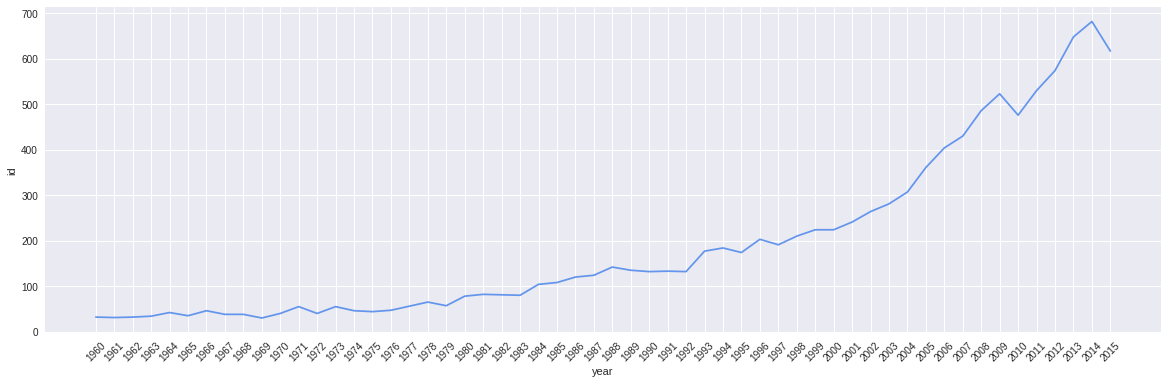

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(data=highest_release, 
             x='year', 
             y='id', color = 'cornflowerblue')
plt.xticks(rotation=45)
plt.show()

***2014** was the year with the highest release of the movie, total of 682 movies were released, **followed by 2013 and 2015** with 648 and 617 movies, respectively*

**2 WHICH MONTH HAS THE HIGHEST RELEASE OF MOVIE**

In [ ]:
highest_month = movie.groupby('month').count()[['id']].reset_index()
highest_month[highest_month['id'] == highest_month['id'].max()]

,month,id
8,09,1318


In [ ]:
movie['month'].value_counts().reset_index().sort_values(by = 'index', ascending = True)

,index,month
4,01,888
11,02,680
6,03,814
9,04,791
7,05,807
5,06,822
10,07,790
3,08,906
0,09,1318
1,10,1137


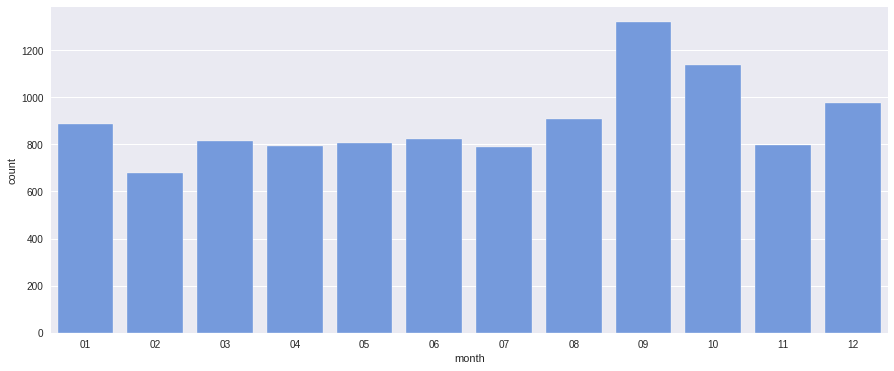

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(data=movie,
              x='month',
              order = movie['month'].value_counts().reset_index().sort_values(by = 'index', ascending = True)['index'], color = 'cornflowerblue')

*It seems like the end of the year was the time with the highest release of movies, especially the end of Q3 beginning of Q4. The lead was September, then October and December, respectively.*

**3 WHICH MOVIE HAS THE HIGHEST OR LOWEST BUDGET?**

In [ ]:
#Highest budget
movie['budget'].max()

425000000

In [ ]:
movie[movie['budget'] == movie['budget'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month
2244,46528,tt1032751,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0,2010,12


*The movie with the highest budget aka investment was **The Warrior's Way** I have searched about the movie to see why it had highest investment at that time. The Warrior's Way is a 2010 New Zealand-South Korean fantasy action film written and directed by Sngmoo Lee and starring Jang Dong-gun, Kate Boswort*

In [ ]:
#Lowest budget
movie['budget'].min()

0

In [ ]:
movie[movie['budget'] == movie['budget'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015,0.0,2.700677e+07,2015,06
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6.2,2015,0.0,2.056620e+07,2015,09
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,Thriller,Furthur Films,2015-04-17,81,5.5,2015,0.0,4.222338e+04,2015,04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.0,0.000000e+00,2015,06
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.0,0.000000e+00,2015,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,1966-05-20,13,7.0,1966,0.0,0.000000e+00,1966,05
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,Documentary,Bruce Brown Films,1966-06-15,11,7.4,1966,0.0,0.000000e+00,1966,06
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,1966-12-21,20,5.7,1966,0.0,0.000000e+00,1966,12
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,Mystery|Comedy,Mosfilm,1966-01-01,11,6.5,1966,0.0,0.000000e+00,1966,01


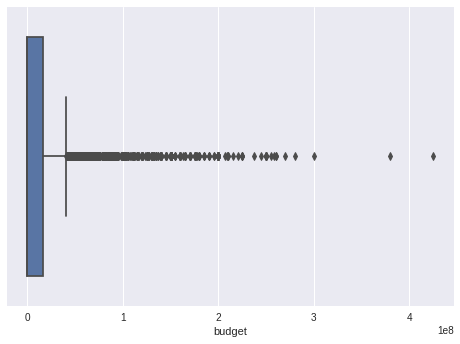

In [ ]:
sns.boxplot(data=movie,
            x='budget')

*After checking, there are more than **5000 movies with 0 invesment**. I wonder if the dataset was collected correctly or, in any case, people didn't update the numbers, but if the numbers were 5572, it accounted for nearly half of the dataset. Quite a shock to me. How about you?*

**4 WHICH MOVIE HAS THE HIGHEST OR LOWEST REVENUE**

In [ ]:
#HIGHEST REVENUE
movie['revenue'].max()

2781505847

In [ ]:
movie[movie['revenue'] == movie['revenue'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2009,12


In [ ]:
#LOWEST REVENUE
movie['revenue'].min()

0

In [ ]:
movie[movie['revenue'] == movie['revenue'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015,2.759999e+07,0.0,2015,01
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015,1.839999e+07,0.0,2015,05
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.000000e+00,0.0,2015,06
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.000000e+00,0.0,2015,06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0,2015,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,Documentary,Bruce Brown Films,1966-06-15,11,7.4,1966,0.000000e+00,0.0,1966,06
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,1966-12-21,20,5.7,1966,0.000000e+00,0.0,1966,12
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,Mystery|Comedy,Mosfilm,1966-01-01,11,6.5,1966,0.000000e+00,0.0,1966,01
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,Action|Comedy,Benedict Pictures Corp.,1966-11-02,22,5.4,1966,0.000000e+00,0.0,1966,11


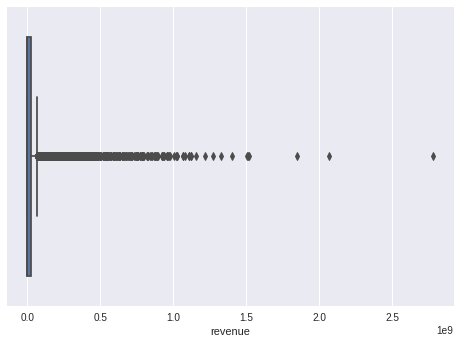

In [ ]:
sns.boxplot(data=movie,
            x='revenue')

*The same concern to the revenue metric. Half of the dataset didn't record any revenue. Perhaps the revenue was collected somewhere but has yet updated*

**5 WHICH MOVIE HAS THE HIGHEST OR LOWEST PROFIT? TOP 10 MOVIES WHICH EARN HIGHEST PROFIT**

In [ ]:
movie['profit'] = movie['revenue'] - movie['budget']

In [ ]:
#HIGHEST PROFIT
movie[movie['profit'] == movie['profit'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month,profit
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2009,12,2544505847


In [ ]:
#LOWEST PROFIT
movie[movie['profit'] == movie['profit'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month,profit
2244,46528,tt1032751,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0,2010,12,-413912431


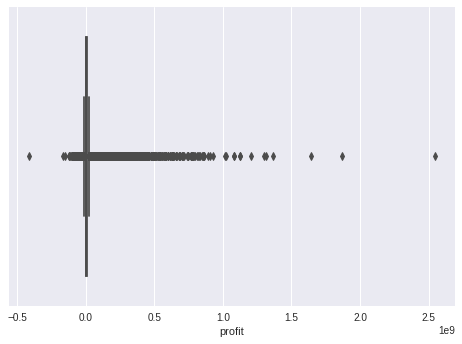

In [ ]:
sns.boxplot(data=movie,
            x='profit')

In [ ]:
#TOP 10 MOVIES EARN HIGHEST PROFIT
top_profit = movie.groupby('original_title')['profit'].sum().reset_index().sort_values(by = 'profit', ascending = False).head(10)

In [ ]:
top_profit

,original_title,profit
811,Avatar,2544505847
7278,Star Wars: The Force Awakens,1868178225
9597,Titanic,1632034188
4372,Jurassic World,1363528810
3172,Furious 7,1316249360
7746,The Avengers,1288080742
3552,Harry Potter and the Deathly Hallows: Part 2,1202817822
3153,Frozen,1127284869
813,Avengers: Age of Ultron,1125035767
8832,The Net,1084279658


In [ ]:
top_budget = movie.groupby('original_title')['budget'].sum().reset_index().sort_values(by = 'budget', ascending = False).head(10)

In [ ]:
movie['gross_margin'] = (movie['revenue'] - movie['budget'])/movie['budget']*100

In [ ]:
successful_movie = movie[movie['gross_margin'] > 200]

In [ ]:
blockbuster_movie = movie[movie['revenue'] > 1000000000] #more than 1 bil USD

Text(0.5, 1.0, 'Top 10 movies with highest profit')

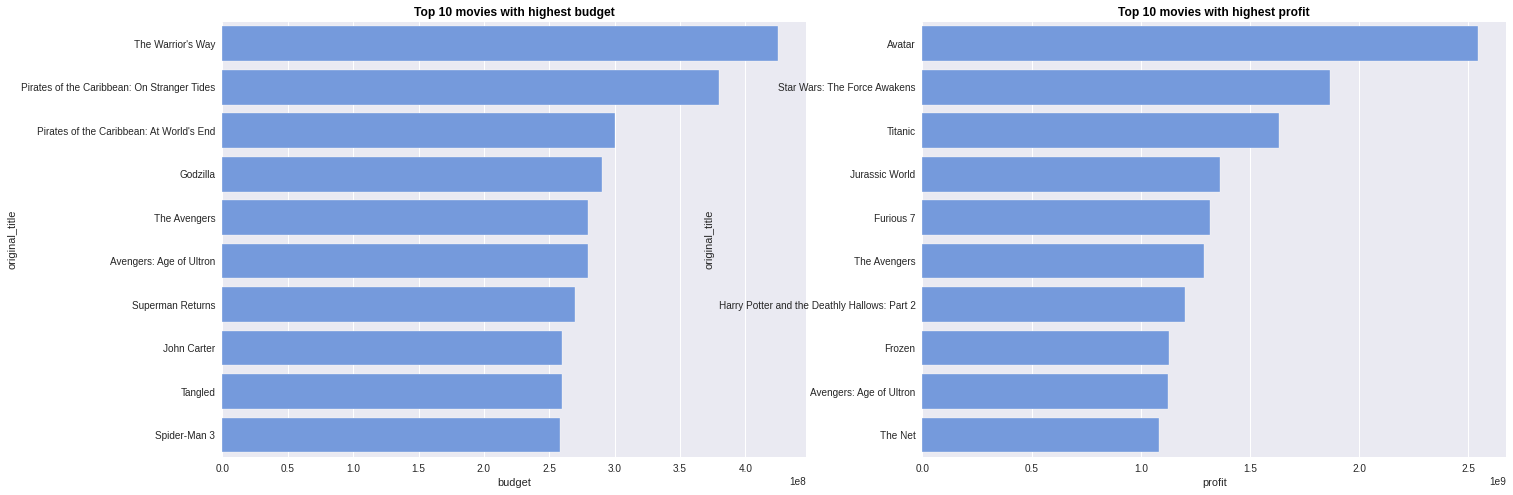

In [ ]:
plt.figure(figsize = (23,8))

plt.subplot(121)
sns.barplot(data = top_budget, x = 'budget', y = 'original_title', color = 'cornflowerblue')
plt.title('Top 10 movies with highest budget', size = 12, color = 'black', fontweight = 'bold')


plt.subplot(122)
sns.barplot(data = top_profit, x = 'profit', y = 'original_title', color = 'cornflowerblue')
plt.title('Top 10 movies with highest profit', size = 12, color = 'black', fontweight = 'bold')

*Looking at the two charts above about the top 10 highest-invested movies and top 10 highest-profit movies, **only 2 of the most invested movies are in the top 10 most profitable movies**, showing us the degree of non-correlation between investment and results*

**5 MOVIE WITH SHORTEST AND LONGEST RUNTIME**

In [ ]:
#Longest runtime
movie['runtime'].max()

900

In [ ]:
movie[movie['runtime'] == movie['runtime'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month,profit,gross_margin
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,2011-09-03,14,9.2,2011,0.0,0.0,2011,09,0,NaN


In [ ]:
#Shortest runtime
movie['runtime'].min()

0

In [ ]:
movie[movie['runtime'] == movie['runtime'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month,profit,gross_margin
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,2015-12-19,11,5.4,2015,0.000000e+00,0.0,2015,12,0,NaN
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,2015-11-09,80,6.5,2015,0.000000e+00,0.0,2015,11,0,NaN
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,2015-01-01,15,5.6,2015,0.000000e+00,0.0,2015,01,0,NaN
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,2015-10-09,52,5.0,2015,0.000000e+00,0.0,2015,10,0,NaN
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,2015-04-05,11,5.4,2015,0.000000e+00,0.0,2015,04,0,NaN
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,2015-01-01,11,4.6,2015,0.000000e+00,0.0,2015,01,0,NaN
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,2015-11-10,20,6.6,2015,0.000000e+00,0.0,2015,11,0,NaN
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,2014-10-20,16,3.4,2014,2.993546e+06,0.0,2014,10,-3250000,-100.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,2014-10-30,14,6.0,2014,0.000000e+00,0.0,2014,10,0,NaN
1849,18247,tt1212986,0.120350,0,0,Spectacular!,Nolan Gerard Funk|Jesse Moss|Britt Irvin|Tammi...,NaN,Robert Iscove,NaN,...,2009-02-16,13,5.2,2009,0.000000e+00,0.0,2009,02,0,NaN


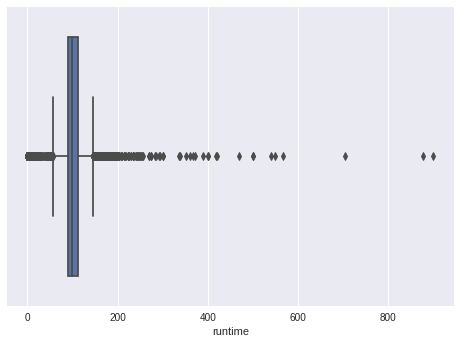

In [ ]:
sns.boxplot(data=movie,
            x='runtime')

*The Story of Film: An Odyssey is a 2011 British documentary film about the history of film, presented on television in 15 one-hour chapters with a total length of over 900 minutes, having the highest runtime in the list*

**6 WHICH MOVIES GET THE HIGHEST AND LOWEST VOTES(RATING)**

In [ ]:
#Highest Rating
movie['vote_average'].max()

9.2

In [ ]:
movie[movie['vote_average'] == movie['vote_average'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month,profit,gross_margin
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,2011-09-03,14,9.2,2011,0.0,0.0,2011,09,0,NaN


In [ ]:
#Lowest Rating
movie['vote_average'].min()

1.5

In [ ]:
movie[movie['vote_average'] == movie['vote_average'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month,profit,gross_margin
7772,25055,tt0960835,0.121120,0,0,Transmorphers,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...,NaN,Leigh Scott,NaN,...,2007-06-26,10,1.5,2007,0.000000,0.0,2007,06,0,NaN
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,1966-11-15,15,1.5,1966,127642.279154,0.0,1966,11,-19000,-100.0


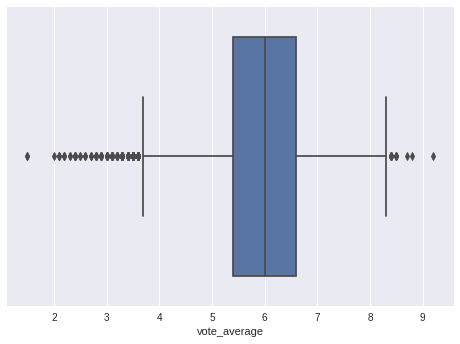

In [ ]:
sns.boxplot(data=movie,
            x='vote_average')

*It seems like movies with 0 budget and revenue are those not published in the cinema, but in other places, that is why there was no revenue captured in these movies*

**7 WHAT ARE THE TOP 10 FREQUENT GENRES WERE MADE?**



In [ ]:
genres_profit = movie.groupby('genres')['profit'].sum().reset_index().sort_values(by = 'profit', ascending = False).head(10)
genres_profit

,genres,profit
682,Comedy,13552672742
977,Drama,9320240615
843,Comedy|Romance,8132157435
512,Adventure|Fantasy|Action,5820583556
641,Animation|Family,4859226154
762,Comedy|Drama|Romance,4845663457
109,Action|Adventure|Science Fiction,4825984307
547,Adventure|Fantasy|Family,4799516484
389,Adventure|Action|Science Fiction,4362926988
1186,Drama|Romance,4094224956


In [ ]:
genres_count = movie.groupby('genres')['id'].count().sort_values(ascending = False).reset_index()
genres_count.head(10)

,genres,id
0,Drama,710
1,Comedy,706
2,Drama|Romance,289
3,Comedy|Drama,280
4,Documentary,274
5,Comedy|Romance,267
6,Horror|Thriller,259
7,Horror,253
8,Comedy|Drama|Romance,222
9,Drama|Thriller,138


In [ ]:
genres = pd.merge(genres_profit, genres_count, on = 'genres', how = 'inner')
genres['billion (USD)'] = round((genres['profit']/1000000000),2)
genres

,genres,profit,id,billion (USD)
0,Comedy,13552672742,706,13.55
1,Drama,9320240615,710,9.32
2,Comedy|Romance,8132157435,267,8.13
3,Adventure|Fantasy|Action,5820583556,16,5.82
4,Animation|Family,4859226154,84,4.86
5,Comedy|Drama|Romance,4845663457,222,4.85
6,Action|Adventure|Science Fiction,4825984307,22,4.83
7,Adventure|Fantasy|Family,4799516484,11,4.80
8,Adventure|Action|Science Fiction,4362926988,12,4.36
9,Drama|Romance,4094224956,289,4.09


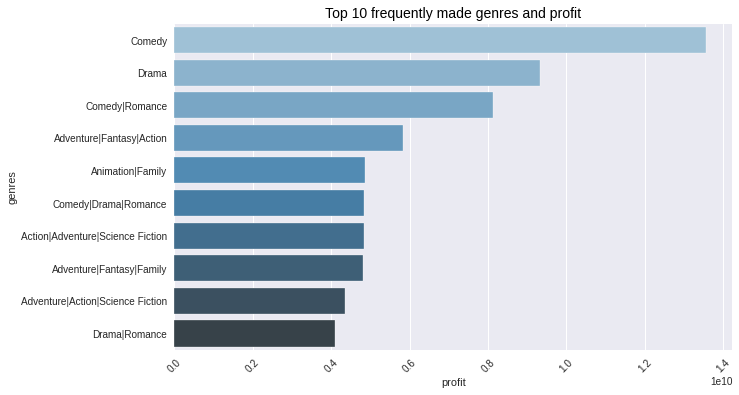

In [ ]:
plt.figure(figsize = (10,6))
sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
sns.barplot(data = genres,
             x = 'profit', 
             y = 'genres', palette='Blues_d')
plt.title('Top 10 frequently made genres and profit', size = 14, color = 'black')
plt.xticks(rotation=45)
plt.show()

*In this session, we can see that **Drama, Comedy, and Romance** are top three frequently made genres, meaning they are also the most profitable. Besides, **Action, Fantasy, and Adventure** also contributed large proportions*

**8 NAME OF TOP 10 DIRECTORS HAVE THE MOST SUCCESSFUL MOVIES?**

In [ ]:
#Successfull = high revenue
director_profit = movie.groupby('director')['profit'].sum().sort_values(ascending = False).reset_index()

In [ ]:
director_count = movie.groupby('director')['id'].count().sort_values(ascending = False).reset_index()

In [ ]:
director = pd.merge(director_profit, director_count, on = 'director', how = 'inner')
director.head(10)

,director,profit,id
0,Steven Spielberg,7428613772,29
1,Peter Jackson,5196468949,13
2,James Cameron,5081849077,9
3,Michael Bay,3557208171,11
4,David Yates,3379295625,5
5,Chris Columbus,3224491668,14
6,Christopher Nolan,3162548502,10
7,George Lucas,2955996893,6
8,Robert Zemeckis,2843990869,17
9,J.J. Abrams,2839169916,5


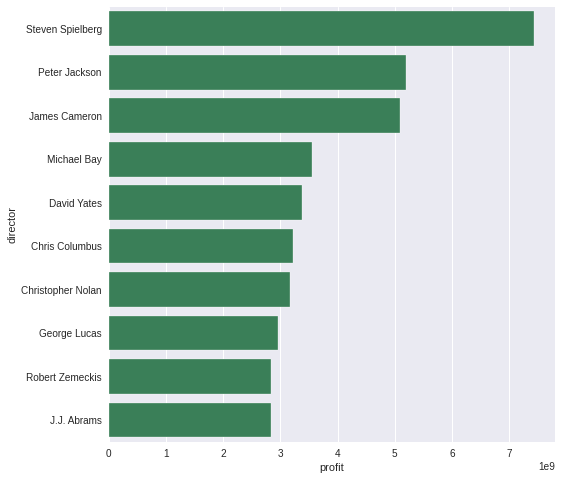

In [ ]:
plt.figure(figsize = (8,8))
sns.light_palette("seagreen")
sns.barplot(data=director.head(10),
            x = 'profit',
            y = 'director', color ="seagreen")

*The most profitable movie director on the list is **Steven Spielberg**, who directed **29 movies**, with the most movies in top 10. Some of his famous movies are Jurassic World, Indiana Jones, Catch me if you can...**David Yates** is the director with the **least number** of films appearing in the top 5 with five films, some of them are the Harry Potters series or Fantastic Beasts...*

**9 WHAT ARE THE TOP 10 FREQUENT CASTS IN ALL MOVIES AND IN SUCCESSFUL MOVIES?**



In [ ]:
#Top 10 frequent casts in all movie
cast_df = movie['cast'].str.split('|').explode('cast').value_counts().reset_index()
cast_df.columns = ['Casts', 'Counts']
cast_df.head(10)

,Casts,Counts
0,Robert De Niro,72
1,Samuel L. Jackson,71
2,Bruce Willis,62
3,Nicolas Cage,61
4,Michael Caine,53
5,Robin Williams,51
6,John Cusack,50
7,Morgan Freeman,49
8,John Goodman,49
9,Susan Sarandon,48


In [ ]:
#Top 10 frequenct casts in successfull movies
successful_cast = successful_movie['cast'].str.split('|').explode('cast').value_counts().reset_index()
successful_cast.columns = ['Casts', 'Counts']
successful_cast.head(10)

,Casts,Counts
0,Robert De Niro,26
1,Clint Eastwood,25
2,Tom Hanks,24
3,Samuel L. Jackson,21
4,Robin Williams,21
5,Tom Cruise,20
6,Dustin Hoffman,20
7,Sylvester Stallone,18
8,Brad Pitt,17
9,Morgan Freeman,17


In [ ]:
#Top 10 frequenct casts in blockbuster movies (more than 1 bil USD)
blockbuster_cast = blockbuster_movie['cast'].str.split('|').explode('cast').value_counts().reset_index()
blockbuster_cast.columns = ['Casts', 'Counts']
blockbuster_cast.head(10)

,Casts,Counts
0,Johnny Depp,3
1,Robert Downey Jr.,3
2,Michelle Rodriguez,2
3,Orlando Bloom,2
4,Scarlett Johansson,2
5,Chris Evans,2
6,Mark Ruffalo,2
7,Chris Hemsworth,2
8,Christian Bale,2
9,Michael Keaton,2


Text(0.5, 1.0, 'Blockbuster Movies')

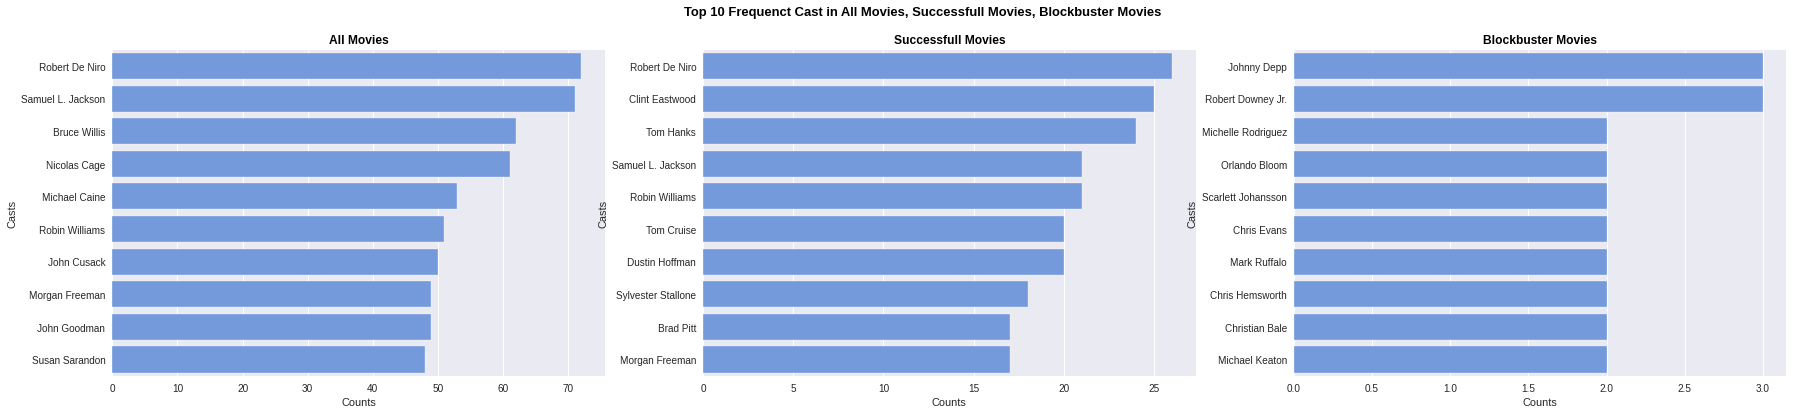

In [ ]:
plt.figure(figsize = (30,6))
plt.suptitle('Top 10 Frequenct Cast in All Movies, Successfull Movies, Blockbuster Movies', size = 13, color = 'black', fontweight = 'bold')

plt.subplot(131)
sns.barplot(data = cast_df.head(10), x = 'Counts', y = 'Casts', color = 'cornflowerblue')
plt.title('All Movies', size = 12, color = 'black', fontweight = 'bold')


plt.subplot(132)
sns.barplot(data = successful_cast.head(10), x = 'Counts', y = 'Casts', color = 'cornflowerblue')
plt.title('Successfull Movies', size = 12, color = 'black', fontweight = 'bold')

plt.subplot(133)
sns.barplot(data = blockbuster_cast.head(10), x = 'Counts', y = 'Casts', color = 'cornflowerblue')
plt.title('Blockbuster Movies', size = 12, color = 'black', fontweight = 'bold')

*Above are three charts representing for top 10 casts in different aspects. **Robert De Niro** is the actor who appears in most movies with the maximum frequency. One of the exciting facts is that the top 10 frequent casts in All Movies or Successful Movies are different from the top 10 in blockbuster movies. **Johnny Depp and Robert Downey Jr have three blockbuster movies.** While Johnny is famous for his Pirates of the Caribbean series, Robert is loved worldwide thanks to the Iron Man*

**10 CORRELATION BETWEEN INDICATORS**

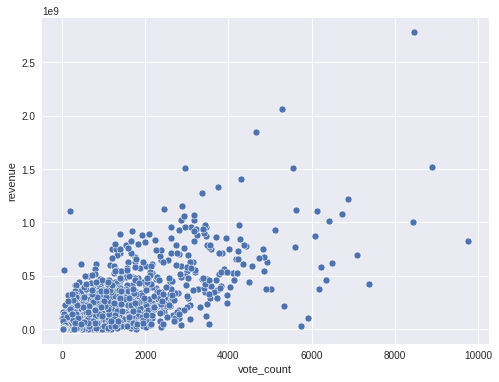

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=movie,
                x='vote_count',
                y='revenue')
plt.show()

*Witnessing slight positive correlation between vote counts and revenue*

In [ ]:
num = movie[['popularity','budget','revenue','runtime','vote_count','vote_average', 'profit']]
num.corr() # Correlation

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.544189,0.662824,0.138019,0.800613,0.218123,0.628681
budget,0.544189,1.000000,0.734436,0.191897,0.632021,0.087467,0.569663
revenue,0.662824,0.734436,1.000000,0.164138,0.790873,0.178699,0.976172
runtime,0.138019,0.191897,0.164138,1.000000,0.164825,0.178311,0.137414
vote_count,0.800613,0.632021,0.790873,0.164825,1.000000,0.260799,0.755666
vote_average,0.218123,0.087467,0.178699,0.178311,0.260799,1.000000,0.188438
profit,0.628681,0.569663,0.976172,0.137414,0.755666,0.188438,1.000000


In [ ]:
num.corr().style.background_gradient(cmap='Blues')

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.544189,0.662824,0.138019,0.800613,0.218123,0.628681
budget,0.544189,1.000000,0.734436,0.191897,0.632021,0.087467,0.569663
revenue,0.662824,0.734436,1.000000,0.164138,0.790873,0.178699,0.976172
runtime,0.138019,0.191897,0.164138,1.000000,0.164825,0.178311,0.137414
vote_count,0.800613,0.632021,0.790873,0.164825,1.000000,0.260799,0.755666
vote_average,0.218123,0.087467,0.178699,0.178311,0.260799,1.000000,0.188438
profit,0.628681,0.569663,0.976172,0.137414,0.755666,0.188438,1.000000


*Strong correlation among vote count with popularity and profit, meaning more votes from people, either good or bad, will help to bring more attention and thereby bring more revenue*

**11 WHAT ARE WORDS MOST USED IN TAGLINE? NUMBER OF WORDS IN TAGLINE?**

In [ ]:
movie['tagline_count'] = movie['tagline'].str.split().str.len()

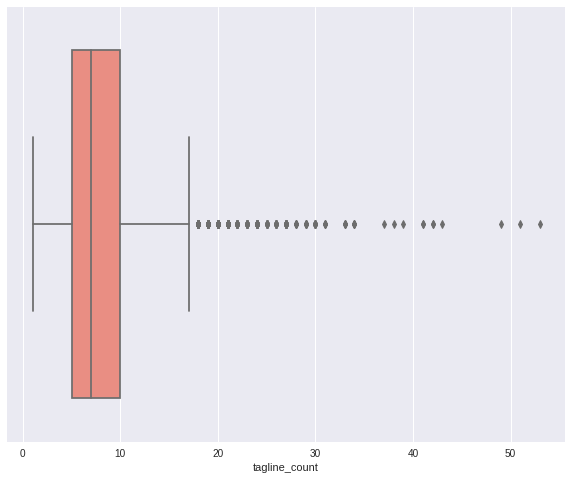

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.boxplot(data = movie,
            x = 'tagline_count', color = 'salmon')

In [ ]:
tagline = movie['tagline'].dropna()
word_string=" ".join(str(x) for x in tagline)

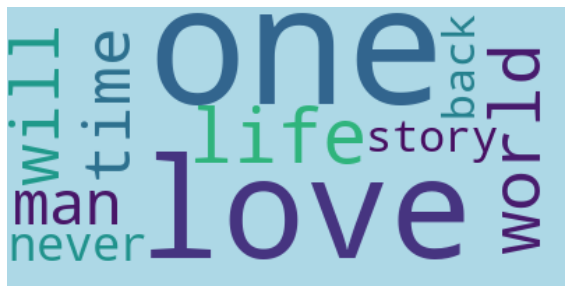

In [ ]:
plt.figure(figsize=(10,7))
wc = WordCloud(background_color="lightblue", stopwords = STOPWORDS, max_words=10)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=7), interpolation="bilinear")
plt.axis('off');

*Average len of tagline is around **5-10 words**. Containing words like love, story, man, back, life, world, never, time ....*

**12 TOP 10 PRODUCTION COMPANIES WITH HIGHER NUMBER OF RELEASES? HIGHER PROFIT**

In [ ]:
movie['companies_count'] = movie['production_companies'].str.split('|').str.len()

In [ ]:
#Top 10 Production Companies with high number of releases?
movie.groupby('production_companies')['companies_count'].count().sort_values(ascending = False).reset_index().head(10)

,production_companies,companies_count
0,Paramount Pictures,156
1,Universal Pictures,133
2,Warner Bros.,84
3,Walt Disney Pictures,75
4,Metro-Goldwyn-Mayer (MGM),72
5,Columbia Pictures,72
6,New Line Cinema,61
7,Touchstone Pictures,51
8,20th Century Fox,50
9,Twentieth Century Fox Film Corporation,49


*Paramount Pictures has the highest number of movies released, a total of 156 movies. Followed by Universal Pictures, Warner Bros, Walt Disney...*

In [ ]:
top10_revenue = movie.sort_values(by = ['revenue'], ascending = False).head(10)
top10_revenue.groupby(['original_title', 'production_companies', 'revenue'])['companies_count'].sum().reset_index().sort_values(by = 'revenue', ascending = False)

,original_title,production_companies,revenue,companies_count
0,Avatar,Ingenious Film Partners|Twentieth Century Fox ...,2781505847,4.0
7,Star Wars: The Force Awakens,Lucasfilm|Truenorth Productions|Bad Robot,2068178225,3.0
9,Titanic,Paramount Pictures|Twentieth Century Fox Film ...,1845034188,3.0
8,The Avengers,Marvel Studios,1519557910,1.0
6,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,1513528810,5.0
3,Furious 7,Universal Pictures|Original Film|Media Rights ...,1506249360,5.0
1,Avengers: Age of Ultron,Marvel Studios|Prime Focus|Revolution Sun Studios,1405035767,3.0
4,Harry Potter and the Deathly Hallows: Part 2,Warner Bros.|Heyday Films|Moving Picture Compa...,1327817822,3.0
2,Frozen,Walt Disney Pictures|Walt Disney Animation Stu...,1274219009,2.0
5,Iron Man 3,Marvel Studios,1215439994,1.0


In [ ]:
#Number of total movies that produced by Marvel Studios
movie['production_companies'].str.contains('Marvel Studios').sum()

25

*Among top 10 blockbuster movies, **Marvel Studios** is the only production company that could produce movies by themselves without corporating with any other companies. Marvel Studios produced total 25 movies and 20 of them were self-made*

## Conclusions:
- In term of year, **2014** was the year with highest release of the movie, followed by 2013 and 2015
- In term of month, **September** was the month with highest release of the movie, more movies released in Q4
- **Only 2 of the most invested movies** are in the top 10 most profitable movies, showing us the degree of non-correlation between investment and results
- **The Story of Film: An Odyssey** is presented on television in 15 one-hour chapters with a total length of over 900 minutes, having the highest runtime in the list
- Movies with 0 budget and revenue are those not published in the cinema, but in other places and half of the dataset didn't record any revenue
- **Drama, Comedy, and Romance** are top three frequently made genres, meaning they are also the most profitable. Besides, **Action, Fantasy, and Adventure** also contributed large proportions
- The most profitable movie director on the list is **Steven Spielberg**, who directed 29 movies. **David Yates** is the director with the least number of films appearing in the top 5 with five films, some of them are the Harry Potters series or Fantastic Beasts...
- **Robert De Niro** is the actor who appears in most movies and successful movie as well between 1960-2015
- Top 10 frequent casts in All Movies or Successful Movies are totally different from the top 10 in blockbuster movies. 
- **Johnny Depp and Robert Downey Jr** have appeared in the most blockbuster movies till 2015, total of 3 movies each.
- **Strong correlation** among **vote count with popularity and profit**, meaning more votes from people, either good or bad, will help to bring more attention and thereby bring more revenue
- Average len of tagline is around **5-10 words**. Containing words like love, story, man, back, life, world, never, time ....
- **Paramount Pictures** has the highest number of movies released, a total of 156 movies.
- Among top 10 blockbuster movies, **Marvel Studios** is the only production company that could **produce movies by themselves** without corporating with any other companies.